# Klimamodeller og svarte legemer

I denne notebooken skal vi se på hvordan vi kan lage enkle klimamodeller.

<img src="bilder/klimamodell.png" width="800px">

In [1]:
from pylab import pi

## Stefan-Boltzmann loven

Et hvert svart legeme utstråler lys (elektromagnetisk stråling) basert på sin temperatur. Dette fenomenet brukes mye i astrofysikk, blant annet for å regne ut hvor mye energi som stråles ut av en stjerne, men og i klimafysikk, for å regne ut temperaturen til jorden.

I dette opplegget vil vi se litt på hvordan Stefan-Boltzmann loven kan brukes for å modellere jordens energibalanse, og hvordan den kan brukes for å estimere jordens temperatur. Vi starter med å repetere Stefan-Boltzmann loven for svart-legeme stråling. Stefan-Boltzmann loven sier at et svart legeme med temperatur $T$ og areal $A$ vil utstråle elektromagnetisk stråling med en effekt:

$$ \text{P}_{\text{legeme}} = \sigma T^4 A, $$

hvor $\sigma = 5.6704 \times 10^{-8}~\text{Wm}^{-2}\text{K}^{-4}$ er Stefan-Boltzmann konstanten.

In [2]:
def finn_effekt(temperatur, areal):
    """Bruker Stefan-Boltzmann loven for å regne ut utstrålt effekt av et svart legeme.
    """
    sigma = 5.6704e-8  # W m^(-2) K^(-4)
    return sigma * (temperatur**4) * areal

## Solens utstrålte effekt
Vi vil nå regne ut effekten til solen. For å gjøre det, trenger vi to størrelser: soltemperaturen, gitt ved $T_{\text{sol}}$ og solens overflateareal, $A_{\text{sol}}$.

For å regne ut solens overflateareal bruker vi arealformelen:
$$A_{\text{sol}} = 4 \pi r_{\text{sol}}^2,$$
hvor $r_{\text{sol}}$ er radiusen til solen.

In [3]:
def finn_kuleskallareal(radius):
    """Regner ut arealet til et kuleskall med gitt radius.
    """
    return 4*pi*radius*radius

In [4]:
soltemperatur = 5_778  # K
solradius = 696_340_000  # m
solareal = finn_kuleskallareal(solradius)

Basert på disse størrelsene kan vi nå bruke Stefan-Boltzmann loven til å regne ut soleffekten.

In [5]:
sol_utstrålt_effekt = finn_effekt(soltemperatur, solareal)

print(f"Solen stråler ut {sol_utstrålt_effekt:.0f} W.")

Solen stråler ut 385102551667083037049356288 W.


Vi kan forbedre utskriften ved å bruke vitenskapelig notasjon:

In [6]:
sol_utstrålt_effekt = finn_effekt(soltemperatur, solareal)

print(f"Solen stråler ut {sol_utstrålt_effekt:.2E} W.")

Solen stråler ut 3.85E+26 W.


## Solkonstanten: solens flukstetthet ved jorden

Nå skal vi regne ut hvor mye av solens utstrålte effekt som treffer jorden, $G_{SC}$. For å regne ut det, må vi først regne ut flukstettheten ved jorden. Det gjør vi ved å dele solens utstrålte effekt på arealet til et kuleskall med radius lik avstanden fra solen til jorden. Avstanden fra solen til jorden er $148~880~000~km$, eller $148~880~000~000~m$.

Solens flukstetthet ved jordoverflaten kalles ofte for *solkonstanten* og brukes blant annet for å regne ut hvor mye strøm et solcellekraftverk kan produsere.

In [7]:
avstand_fra_jord_til_sol = 148_880_000_000  # m

In [8]:
solkonstanten = sol_utstrålt_effekt / finn_kuleskallareal(avstand_fra_jord_til_sol)

In [9]:
print(f"Vårt estimat av solkonstanten er {solkonstanten:.2f}")

Vårt estimat av solkonstanten er 1382.59


Solkonstantens faktiske verdi er mellom 1361 og 1367, avhengig av hvordan den måles. 

**Spørsmål til refleksjon:** Hva kan være noen mulige årsaker til vårt overestimat?

**Mulige svar:**

 * Solens temperatur eller avstand er ikke nøyaktig målt
 * Noe av energien blir absorbert mellom solen og jorden
 * Jorden følger ikke en sirkulær bane med solen i sentrum
 

## Jordens innstrålte effekt

Vi vil regne ut jordens temperatur, og for å gjøre det må vi se hvor mye av solens lys som treffer jorden. Og for å finne det må vi bruke formellen
$$P_{\text{sol}} = G_{SC} A_{\text{tverrsnitt}},$$
hvor $G_{SC}$ er solkonstanten vi regnet ut over og $A_{\text{tverrsnitt}}$ er jordens *tverrsnittsareal*. Altså arealet til en sirkel med radius gitt ved jordradiusen.

Grunnen til at vi bruker jordens tverrsnittsareal er at solen er så langt unna jorden at lysbølgene er nesten parallelle. Derfor vil mindre lys treffe jordoverflaten ved polene enn ved ekvator. Hvis vi tar hensyn til det vil det kun være jordens tverrsnittsareal som vi må regne med. Figuren under demonstrerer dette fenomenet.
<img src="bilder/belysningsareal.png" width="200px">
Den bestrålte sirkelen har lik flukstetthet, og den "brettes" over jorden for å finne den nøyaktige innstrålte effekten på et gitt område. Hvis vi kun er interessert i total innstrålt effekt kan vi se vekk fra denne "brettingen" og bare regne med tverrsnittsarealet med konstant flukstetthet.

In [10]:
def finn_sirkelareal(radius):
    """Regner ut arealet til en sirkel med gitt radius"""
    return pi*radius*radius

In [11]:
jordradius = 6_371_000
jord_tverrsnittsareal = finn_sirkelareal(jordradius)

In [12]:
innstrålt_effekt_jord = jord_tverrsnittsareal * solkonstanten

In [13]:
print(f"Den totale innstrålte effekten fra solen er {innstrålt_effekt_jord:.2E} W")

Den totale innstrålte effekten fra solen er 1.76E+17 W


## Energibalanse, jordtemperatur og Stefan-Boltzmann loven

Nå skal vi regne ut jordens gjennomsnittstemperatur. For å gjøre det setter vi opp et energibudsjett, hvor den totale innstrålte effekten er lik den utstrålte effekten:
$$\text{Innstrålt effekt} = \text{Utstrålt effekt}.$$
Hvis energibudsjettet over er oppfylt, vil jordens temperatur forbli konstant, hvis innstrålt effekt er mindre enn utstrålt effekt vil temperaturen synke, og hvis utstrålt effekt er mindre enn innstrålt effekt vil temperaturen øke. I disse beregningene antar vi at jorden er i balanse, og at budjsettet dermed går opp.

Neste spørsmål er hvor den utstrålte effekten kommer fra. Vel, vi kan anta at jorden er et svart legeme, og dermed vil den utstrålte effekten komme i form av svart legeme stråling. Vi kan dermed sette opp energibudjsettet:
$$\text{P}_{\text{sol}} = \text{P}_{\text{jord}},$$
hvor $\text{P}_{\text{sol}}$ er den totale innstrålte effekten fra solen, som vi regnet ut over. Dette energibudsjettet er visualisert i figuren under.
<img src="bilder/energibudsjett.png" width="400px">

Neste steg er å regne ut jordens temperatur, for å gjøre dette bruker vi Stefan-Boltzmann loven, som sier at
$$\text{P}_{\text{jord}} = \sigma T_{\text{jord}}^4 A.$$
Hvis vi løser denne likningen med hensyn på jordtemperaturen, $T_{\text{jord}}$, får vi
$$T_{\text{jord}} = \left(\frac{\text{P}_{\text{jord}}}{\sigma A}\right)^{\frac{1}{4}}.$$
La oss bruke denne sammenhengen for å regne ut jordens temperatur i Kelvin.

In [14]:
def finn_temperatur(utstrålt_effekt, areal):
    """Bruker Stefan-Boltzmann loven for å regne ut temperaturen til et svart legeme basert på utstrålt effekt.
    """
    sigma = 5.6704e-8  # W m^(-2) K^(-4)
    temperatur_K = (utstrålt_effekt / (sigma*areal))**(1/4)
    return temperatur_K - 273.15

In [15]:
jordareal = finn_kuleskallareal(jordradius)
jordtemperatur = finn_temperatur(innstrålt_effekt_jord, jordareal)

In [16]:
print(f"Jordens temperatur er {jordtemperatur:.2f} grader Celsius.")

Jordens temperatur er 6.27 grader Celsius.


Vi får altså at jordtemperaturen er 6.3 grader. Ikke verst!

## Skyene reflekterer solen før den treffer jorden
Vårt foreløpige estimat baserer seg på en jord som er et svart legeme. Men jorden reflekterer jo deler av sollyset. Faktisk reflekterer skyer, isbreer og havet omtrent 30% av alt sollys. Vi må altså forbedre modellen vår.

Måten vi tar hensyn til reflektert lys er med en konstant som heter *albedo*. Albedoen er et tall mellom 0 og 1 måler hvor stor andel av lyset som blir reflektert. Siden omtrent 30% av alt sollys blir reflektert blir albedoen lik 0.3.

Hvis vi setter opp energibalansen på nytt får vi
$$(1 - \alpha) \text{P}_{\text{sol}} = \text{P}_{\text{jord}},$$
hvor $\alpha$ er jordens albedo, $\text{P}_{\text{sol}}$ er solkonstanten og $\text{P}_{\text{jord}}$ er jordens utstrålte effekt. Dette energibudsjettet er visualisert i figuren under.
<img src="bilder/energibudsjett_med_albedo.png" width="400px">

In [17]:
albedo = 0.3
utstrålt_effekt = (1 - albedo) * innstrålt_effekt_jord
jordtemperatur_C = finn_temperatur(utstrålt_effekt, jordareal)

In [18]:
print(f"Jordens temperatur er {jordtemperatur_C:.2f} grader Celsius.")

Jordens temperatur er -17.57 grader Celsius.


Våre foreløpige beregninger av jordtemperaturen er på ca -15 °C, altså omtrent 30 °C mindre (omtrent 10% feil om vi regner i Kelvin) enn det gjennomsnittstemperaturen faktisk er. Hva skyldes denne feilen? Vel den viktigste parameteren vi mangler er drivhuseffekten!

## Visualisere albedoens effekt
Vi ser at jordens albedo senker jordtemperaturen med omtrent 10 °C. Men hvor sensitiv er egentlig jordtemperaturen til en endring i albedo? For å finne ut det kan vi lage et plot!

In [19]:
from pylab import linspace, plot, show, xlabel, ylabel, xlim, ylim

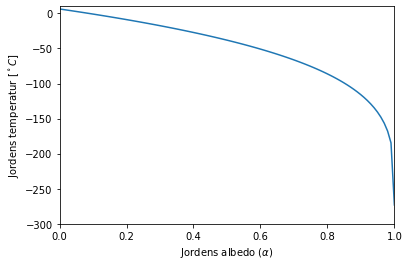

In [20]:
albedo_verdier = linspace(0, 1, 100)
innstrålt_effekt = (1 - albedo_verdier) * innstrålt_effekt_jord
jordtemperatur = finn_temperatur(innstrålt_effekt, jordareal)
plot(albedo_verdier, jordtemperatur)
xlabel(r"Jordens albedo ($\alpha$)")
ylabel(r"Jordens temperatur [$^\circ C$]")
ylim(-300, 10)
xlim(0, 1)
show()